In [1]:

# importing libraries to be used in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
data = pd.read_csv('Uganda_imports_train.csv')## reading the training data
data2 = pd.read_csv('Uganda_imports_test.csv')## reading the test data

In [5]:
data.head(5)

,HS_Code,Item_Description,Country_of_Origin,Port_of_Shipment,Quantity,Quantity_Unit,Net_Mass_kg,Gross_Mass_kg,FOB_Value_USD,Freight_USD,...,Mode_of_Transport,Year,Month,Invoice_Amount,Valuation_Method,Value_per_kg,Value_per_unit,FOB_per_kg,Freight_per_kg,Insurance_per_kg
0,30049099,Generic pharmaceutical products,China,Port Bell,482.42,kg,2220.29375,2403.42875,2352.84,220.04,...,Water,2021,11,9671924.57,Deductive Value Method (DVM),4356.146375,20048.763671,1.059698,0.099104,0.021173
1,30049099,Generic pharmaceutical products,China,Entebbe Airport,131.97,liters,348.67000,377.42000,2084.10,169.47,...,Air,2022,11,8412978.38,Computed Value Method (CVM),24128.770413,63749.173145,5.977285,0.486047,0.048871
2,15079090,Vegetable fats and oils,Germany,Entebbe Airport,113.44,pairs,449.93000,487.04000,2759.84,151.30,...,Air,2022,3,10672562.76,Transaction Value of Similar Goods (TVSG),23720.495988,94081.124471,6.133932,0.336275,0.118818
3,10063010,Milled rice,India,Busia,230.52,units,808.09000,874.73000,2917.65,214.86,...,Land,2023,4,11692581.49,Computed Value Method (CVM),14469.405004,50722.633568,3.610551,0.265886,0.049945
4,84089010,Industrial machinery parts,Saudi Arabia,Entebbe Airport,341.70,boxes,896.63000,970.58000,6971.39,366.85,...,Air,2021,6,26519078.57,Computed Value Method (CVM),29576.390005,77609.243693,7.775102,0.409143,0.147932


In [6]:
data.columns

Index(['HS_Code', 'Item_Description', 'Country_of_Origin', 'Port_of_Shipment',
       'Quantity', 'Quantity_Unit', 'Net_Mass_kg', 'Gross_Mass_kg',
       'FOB_Value_USD', 'Freight_USD', 'Insurance_USD', 'CIF_Value_USD',
       'CIF_Value_UGX', 'Unit_Price_UGX', 'Tax_Rate', 'Currency_Code',
       'Mode_of_Transport', 'Year', 'Month', 'Invoice_Amount',
       'Valuation_Method', 'Value_per_kg', 'Value_per_unit', 'FOB_per_kg',
       'Freight_per_kg', 'Insurance_per_kg'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70734 entries, 0 to 70733
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HS_Code            70734 non-null  int64  
 1   Item_Description   70734 non-null  object 
 2   Country_of_Origin  70734 non-null  object 
 3   Port_of_Shipment   70734 non-null  object 
 4   Quantity           70734 non-null  float64
 5   Quantity_Unit      70734 non-null  object 
 6   Net_Mass_kg        70734 non-null  float64
 7   Gross_Mass_kg      70734 non-null  float64
 8   FOB_Value_USD      70734 non-null  float64
 9   Freight_USD        70734 non-null  float64
 10  Insurance_USD      70734 non-null  float64
 11  CIF_Value_USD      70734 non-null  float64
 12  CIF_Value_UGX      70734 non-null  float64
 13  Unit_Price_UGX     70734 non-null  float64
 14  Tax_Rate           70734 non-null  float64
 15  Currency_Code      70734 non-null  object 
 16  Mode_of_Transport  707

In [8]:
data.shape

(70734, 26)

In [9]:
data2.shape

(70734, 25)

In [10]:
data.describe()

,HS_Code,Quantity,Net_Mass_kg,Gross_Mass_kg,FOB_Value_USD,Freight_USD,Insurance_USD,CIF_Value_USD,CIF_Value_UGX,Unit_Price_UGX,Tax_Rate,Year,Month,Invoice_Amount,Value_per_kg,Value_per_unit,FOB_per_kg,Freight_per_kg,Insurance_per_kg
count,7.073400e+04,70734.000000,70734.000000,70734.000000,70734.000000,70734.000000,70734.000000,70734.000000,7.073400e+04,70734.000000,70734.000000,70734.000000,70734.000000,7.073400e+04,7.073400e+04,70734.000000,70734.000000,70734.000000,70734.000000
mean,4.191993e+07,316.510484,725.907965,785.779035,4306.905577,330.521006,47.082765,4685.703125,1.733099e+07,151323.881453,0.155317,2021.998544,6.531003,1.733099e+07,1.042552e+05,152333.300339,25.923694,1.980020,0.285443
std,2.955857e+07,306.911935,746.192715,807.739029,1836.714353,237.017189,30.995732,2006.422692,7.435594e+06,163745.993050,0.065433,1.413568,3.449242,7.435594e+06,2.004837e+05,162888.295994,49.830173,4.480517,0.625399
min,1.006301e+07,5.250000,2.420000,2.610000,43.470000,1.770000,0.250000,49.930000,1.853126e+05,62.200000,0.050000,2020.000000,1.000000,1.853126e+05,2.483073e+02,692.502512,0.061330,0.001396,0.000270
25%,1.507909e+07,77.900000,151.880000,164.410000,2942.237500,138.342500,22.060000,3200.717500,1.182828e+07,31865.052500,0.100000,2021.000000,4.000000,1.182828e+07,1.408066e+04,32822.002855,3.493699,0.217043,0.033514
50%,3.004910e+07,183.175000,391.195000,423.455000,4203.455000,281.020000,40.760000,4566.110000,1.685398e+07,86718.700000,0.180000,2022.000000,7.000000,1.685398e+07,4.054190e+04,86718.700353,10.079780,0.630055,0.094873
75%,8.408901e+07,467.955000,1099.807500,1190.507500,5548.965000,474.597500,65.840000,6037.455000,2.233353e+07,214177.600000,0.200000,2023.000000,10.000000,2.233353e+07,1.098421e+05,214112.974849,27.311533,1.910924,0.277713
max,8.703232e+07,938.506250,2220.293750,2403.428750,9679.160000,1011.136250,135.630000,10532.156250,3.896148e+07,729221.440000,0.250000,2024.000000,12.000000,3.896148e+07,3.559754e+06,729221.439855,882.133127,115.513932,14.575691


In [11]:
data.nunique()

HS_Code                 10
Item_Description        10
Country_of_Origin       10
Port_of_Shipment         4
Quantity             35402
Quantity_Unit            6
Net_Mass_kg          45867
Gross_Mass_kg        46355
FOB_Value_USD        67130
Freight_USD          45186
Insurance_USD        12060
CIF_Value_USD        67229
CIF_Value_UGX        70619
Unit_Price_UGX       70646
Tax_Rate                 6
Currency_Code            1
Mode_of_Transport        3
Year                     5
Month                   12
Invoice_Amount       70619
Valuation_Method         6
Value_per_kg         70722
Value_per_unit       70720
FOB_per_kg           70679
Freight_per_kg       70085
Insurance_per_kg     67551
dtype: int64

## EXPLAROTORY DATA ANALYSIS

In [12]:
# checking for missing values
data.isnull().sum()

HS_Code              0
Item_Description     0
Country_of_Origin    0
Port_of_Shipment     0
Quantity             0
Quantity_Unit        0
Net_Mass_kg          0
Gross_Mass_kg        0
FOB_Value_USD        0
Freight_USD          0
Insurance_USD        0
CIF_Value_USD        0
CIF_Value_UGX        0
Unit_Price_UGX       0
Tax_Rate             0
Currency_Code        0
Mode_of_Transport    0
Year                 0
Month                0
Invoice_Amount       0
Valuation_Method     0
Value_per_kg         0
Value_per_unit       0
FOB_per_kg           0
Freight_per_kg       0
Insurance_per_kg     0
dtype: int64

In [ ]:
data2.isnull().sum()#checking for missing values in the test data

HS_Code              0
Item_Description     0
Country_of_Origin    0
Port_of_Shipment     0
Quantity             0
Quantity_Unit        0
Net_Mass_kg          0
Gross_Mass_kg        0
FOB_Value_USD        0
Freight_USD          0
Insurance_USD        0
CIF_Value_USD        0
CIF_Value_UGX        0
Tax_Rate             0
Currency_Code        0
Mode_of_Transport    0
Year                 0
Month                0
Invoice_Amount       0
Valuation_Method     0
Value_per_kg         0
Value_per_unit       0
FOB_per_kg           0
Freight_per_kg       0
Insurance_per_kg     0
dtype: int64

In [14]:
# checking for duplicates
data.duplicated().sum()

0

In [15]:
data.describe()

,HS_Code,Quantity,Net_Mass_kg,Gross_Mass_kg,FOB_Value_USD,Freight_USD,Insurance_USD,CIF_Value_USD,CIF_Value_UGX,Unit_Price_UGX,Tax_Rate,Year,Month,Invoice_Amount,Value_per_kg,Value_per_unit,FOB_per_kg,Freight_per_kg,Insurance_per_kg
count,7.073400e+04,70734.000000,70734.000000,70734.000000,70734.000000,70734.000000,70734.000000,70734.000000,7.073400e+04,70734.000000,70734.000000,70734.000000,70734.000000,7.073400e+04,7.073400e+04,70734.000000,70734.000000,70734.000000,70734.000000
mean,4.191993e+07,316.510484,725.907965,785.779035,4306.905577,330.521006,47.082765,4685.703125,1.733099e+07,151323.881453,0.155317,2021.998544,6.531003,1.733099e+07,1.042552e+05,152333.300339,25.923694,1.980020,0.285443
std,2.955857e+07,306.911935,746.192715,807.739029,1836.714353,237.017189,30.995732,2006.422692,7.435594e+06,163745.993050,0.065433,1.413568,3.449242,7.435594e+06,2.004837e+05,162888.295994,49.830173,4.480517,0.625399
min,1.006301e+07,5.250000,2.420000,2.610000,43.470000,1.770000,0.250000,49.930000,1.853126e+05,62.200000,0.050000,2020.000000,1.000000,1.853126e+05,2.483073e+02,692.502512,0.061330,0.001396,0.000270
25%,1.507909e+07,77.900000,151.880000,164.410000,2942.237500,138.342500,22.060000,3200.717500,1.182828e+07,31865.052500,0.100000,2021.000000,4.000000,1.182828e+07,1.408066e+04,32822.002855,3.493699,0.217043,0.033514
50%,3.004910e+07,183.175000,391.195000,423.455000,4203.455000,281.020000,40.760000,4566.110000,1.685398e+07,86718.700000,0.180000,2022.000000,7.000000,1.685398e+07,4.054190e+04,86718.700353,10.079780,0.630055,0.094873
75%,8.408901e+07,467.955000,1099.807500,1190.507500,5548.965000,474.597500,65.840000,6037.455000,2.233353e+07,214177.600000,0.200000,2023.000000,10.000000,2.233353e+07,1.098421e+05,214112.974849,27.311533,1.910924,0.277713
max,8.703232e+07,938.506250,2220.293750,2403.428750,9679.160000,1011.136250,135.630000,10532.156250,3.896148e+07,729221.440000,0.250000,2024.000000,12.000000,3.896148e+07,3.559754e+06,729221.439855,882.133127,115.513932,14.575691


## DETECTING OUTLIERS

In [17]:
# show numeric columns in the train dataset
data.select_dtypes(include=[np.number]).columns.tolist()

['HS_Code',
 'Quantity',
 'Net_Mass_kg',
 'Gross_Mass_kg',
 'FOB_Value_USD',
 'Freight_USD',
 'Insurance_USD',
 'CIF_Value_USD',
 'CIF_Value_UGX',
 'Unit_Price_UGX',
 'Tax_Rate',
 'Year',
 'Month',
 'Invoice_Amount',
 'Value_per_kg',
 'Value_per_unit',
 'FOB_per_kg',
 'Freight_per_kg',
 'Insurance_per_kg']

In [18]:
data.select_dtypes(include=['object', 'category']).columns.tolist()

['Item_Description',
 'Country_of_Origin',
 'Port_of_Shipment',
 'Quantity_Unit',
 'Currency_Code',
 'Mode_of_Transport',
 'Valuation_Method']

In [19]:
# List of numeric columns provided
numeric_columns = [
    'HS_Code', 'Quantity', 'Net_Mass_kg', 'Gross_Mass_kg',
    'FOB_Value_USD', 'Freight_USD', 'Insurance_USD',
    'CIF_Value_USD', 'CIF_Value_UGX', 'Unit_Price_UGX',
    'Tax_Rate', 'Year', 'Month', 'Invoice_Amount',
    'Value_per_kg', 'Value_per_unit', 'FOB_per_kg',
    'Freight_per_kg', 'Insurance_per_kg'
]

# Detect outliers and generate summary messages
def iqr_outlier_summary(data, columns):
    results = []
    for col in columns:
        if col in data.columns:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            outliers = data[(data[col] < lower) | (data[col] > upper)]
            count = len(outliers)
            if count > 0:
                percentage = round((count / len(data)) * 100, 2)
                results.append(f"{col} ---- has {count} outliers. Their percentage on the overall dataset is {percentage}%.")
    return results

# Run the function on the dataframe
outlier_messages = iqr_outlier_summary(data, numeric_columns)
outlier_messages


['FOB_Value_USD ---- has 103 outliers. Their percentage on the overall dataset is 0.15%.',
 'Freight_USD ---- has 1054 outliers. Their percentage on the overall dataset is 1.49%.',
 'Insurance_USD ---- has 1090 outliers. Their percentage on the overall dataset is 1.54%.',
 'CIF_Value_USD ---- has 190 outliers. Their percentage on the overall dataset is 0.27%.',
 'CIF_Value_UGX ---- has 213 outliers. Their percentage on the overall dataset is 0.3%.',
 'Unit_Price_UGX ---- has 4493 outliers. Their percentage on the overall dataset is 6.35%.',
 'Invoice_Amount ---- has 213 outliers. Their percentage on the overall dataset is 0.3%.',
 'Value_per_kg ---- has 6706 outliers. Their percentage on the overall dataset is 9.48%.',
 'Value_per_unit ---- has 4542 outliers. Their percentage on the overall dataset is 6.42%.',
 'FOB_per_kg ---- has 6675 outliers. Their percentage on the overall dataset is 9.44%.',
 'Freight_per_kg ---- has 7491 outliers. Their percentage on the overall dataset is 10.59

Numerical columns: ['HS_Code', 'Quantity', 'Net_Mass_kg', 'Gross_Mass_kg', 'FOB_Value_USD', 'Freight_USD', 'Insurance_USD', 'CIF_Value_USD', 'CIF_Value_UGX', 'Unit_Price_UGX', 'Tax_Rate', 'Year', 'Month', 'Invoice_Amount', 'Value_per_kg', 'Value_per_unit', 'FOB_per_kg', 'Freight_per_kg', 'Insurance_per_kg']


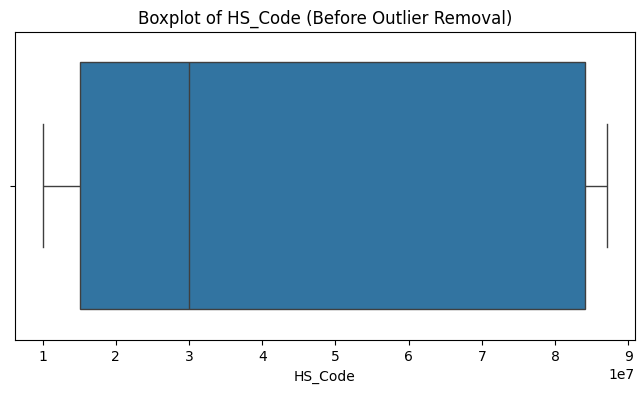

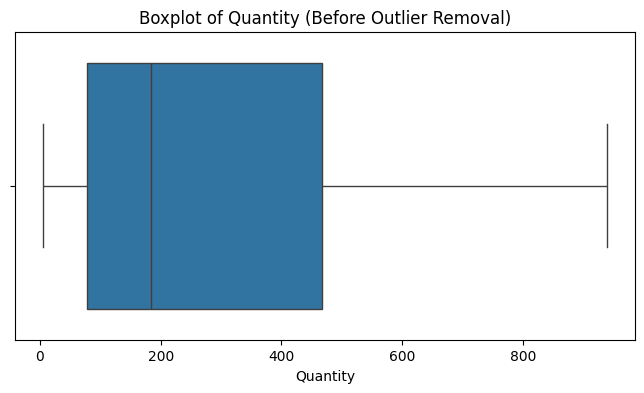

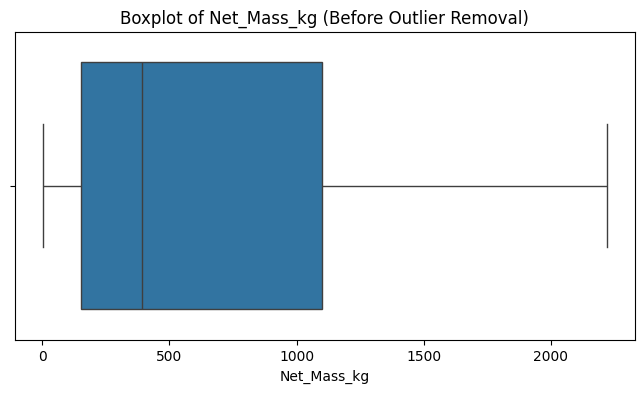

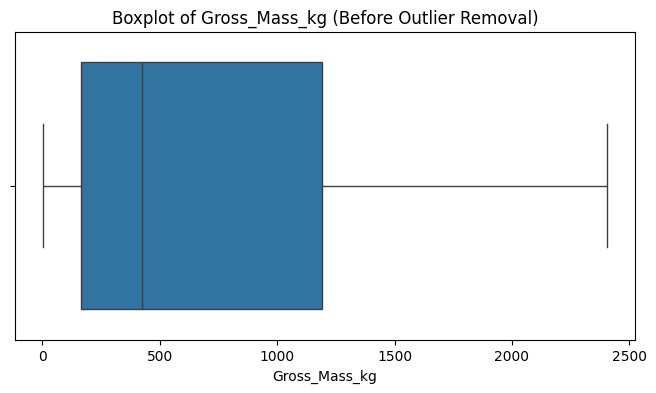

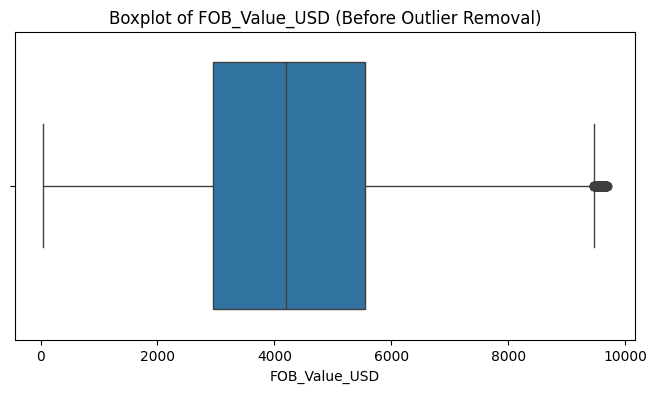

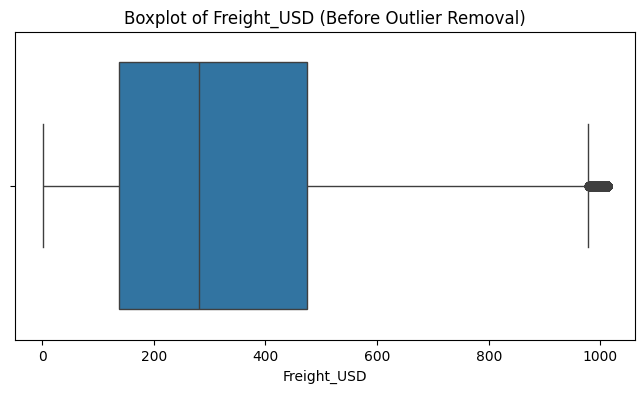

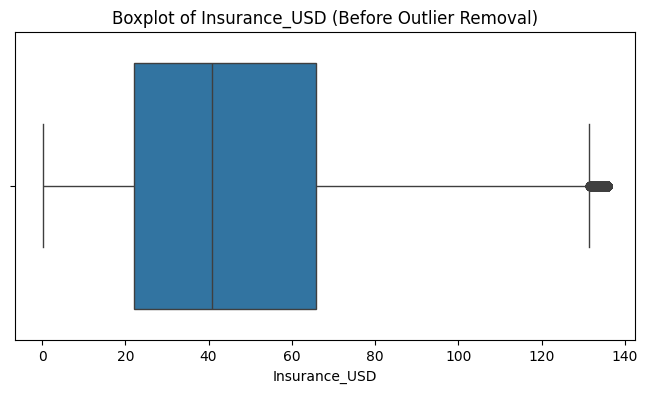

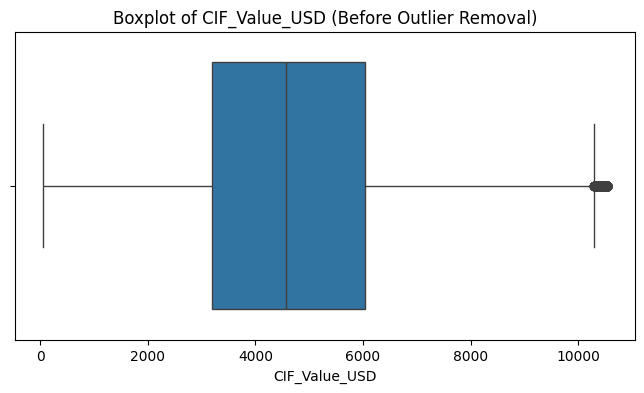

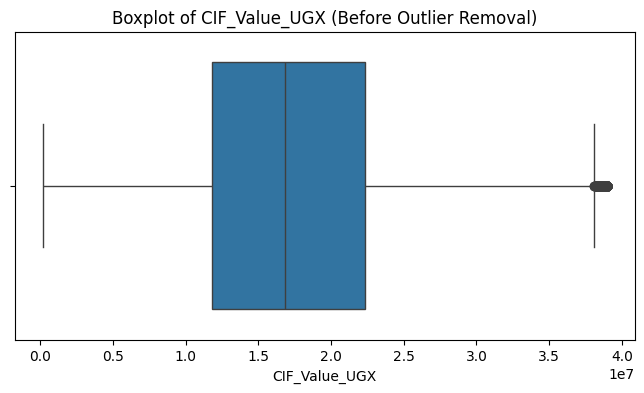

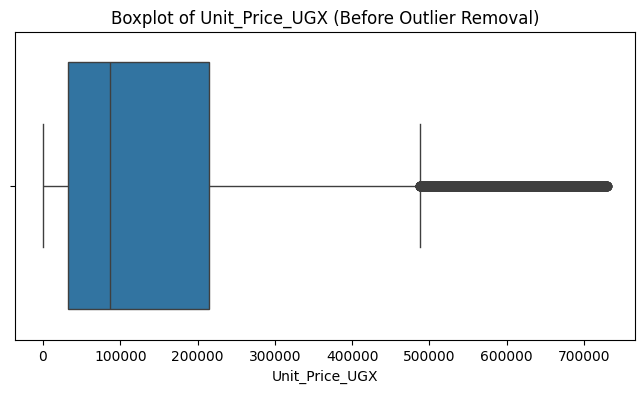

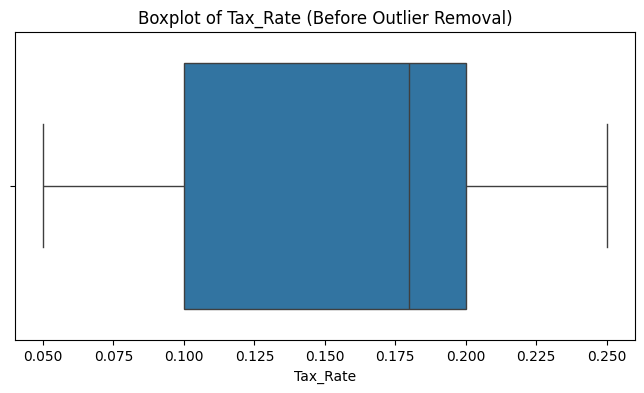

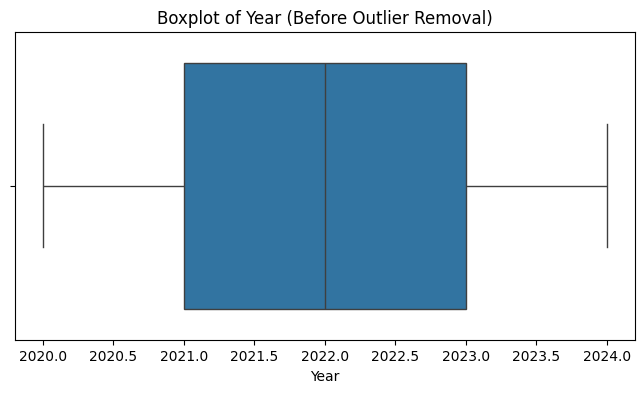

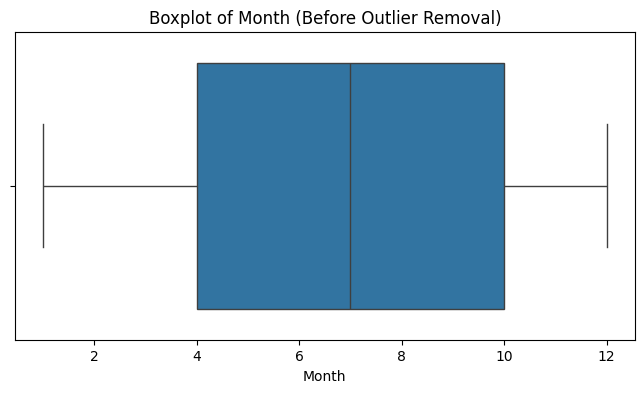

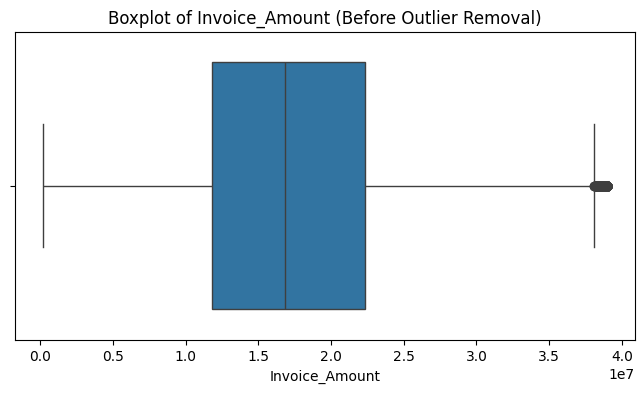

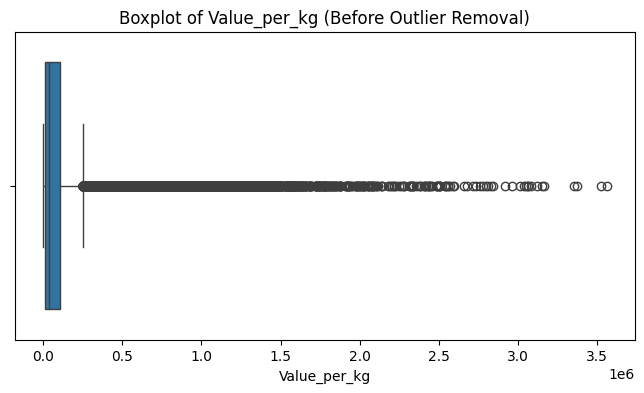

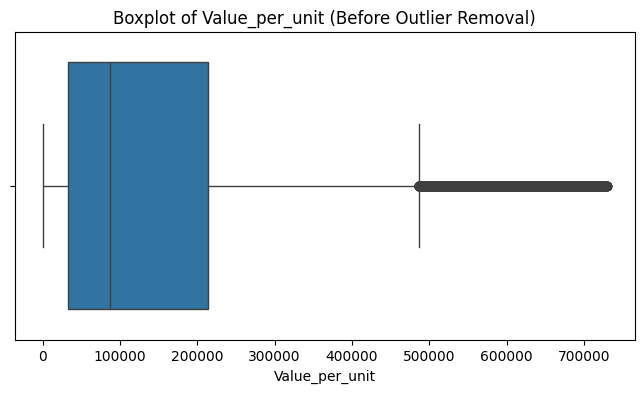

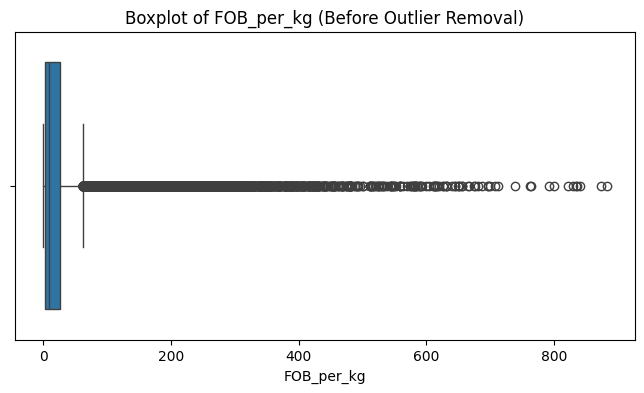

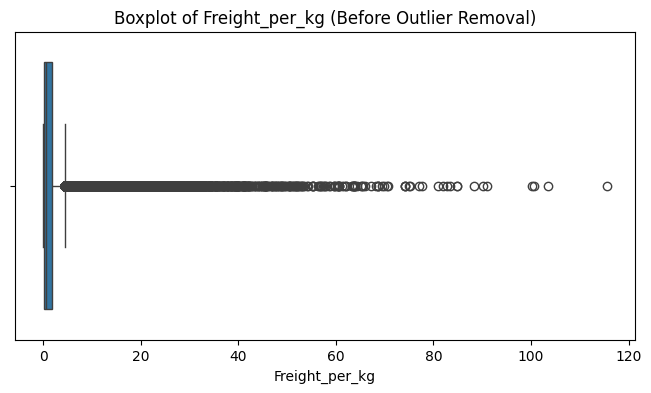

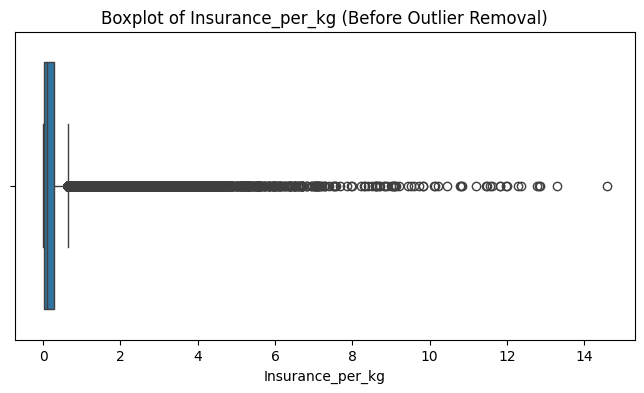

For column HS_Code, removed 0 outliers.
For column Quantity, removed 0 outliers.
For column Net_Mass_kg, removed 0 outliers.
For column Gross_Mass_kg, removed 0 outliers.
For column FOB_Value_USD, removed 103 outliers.
For column Freight_USD, removed 1027 outliers.
For column Insurance_USD, removed 959 outliers.
For column CIF_Value_USD, removed 58 outliers.
For column CIF_Value_UGX, removed 46 outliers.
For column Unit_Price_UGX, removed 4468 outliers.
For column Tax_Rate, removed 0 outliers.
For column Year, removed 0 outliers.
For column Month, removed 0 outliers.
For column Invoice_Amount, removed 15 outliers.
For column Value_per_kg, removed 5883 outliers.
For column Value_per_unit, removed 3277 outliers.
For column FOB_per_kg, removed 3039 outliers.
For column Freight_per_kg, removed 3563 outliers.
For column Insurance_per_kg, removed 3060 outliers.


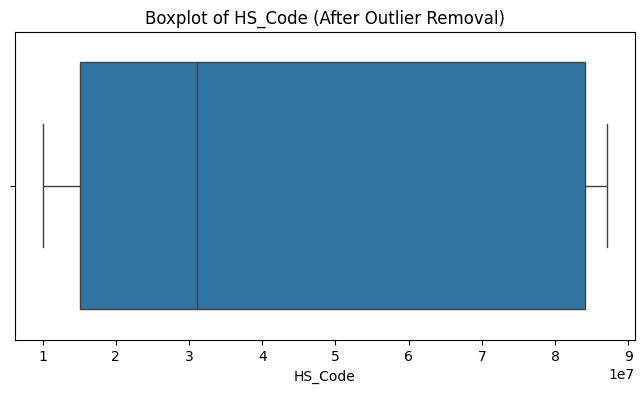

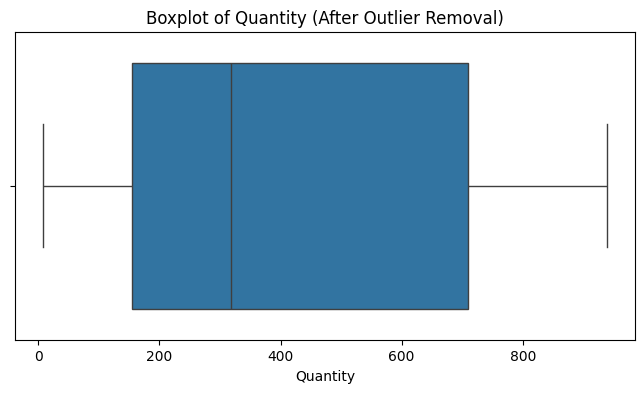

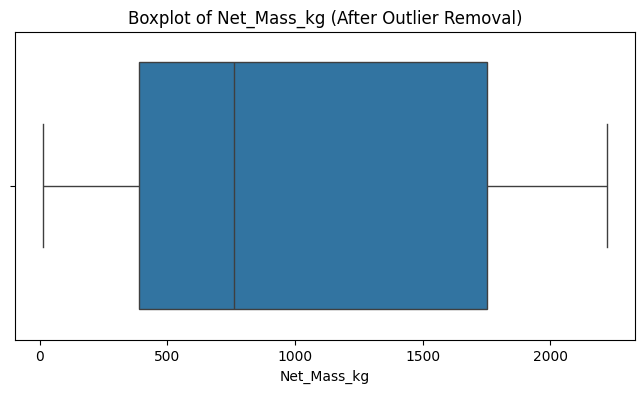

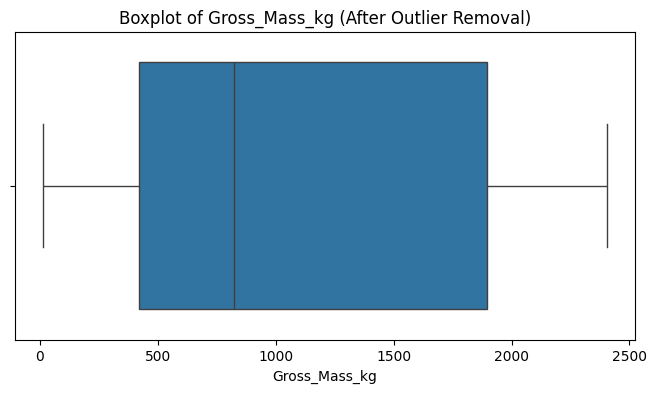

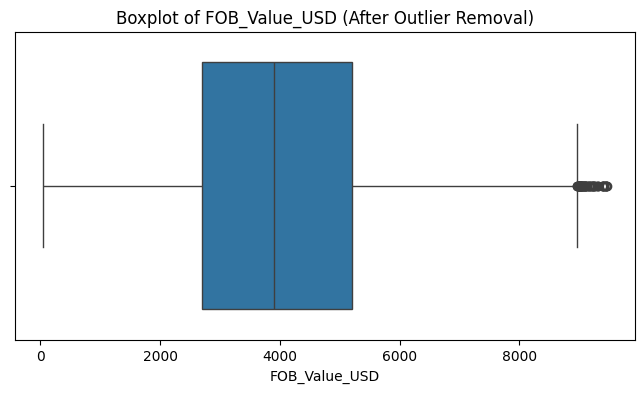

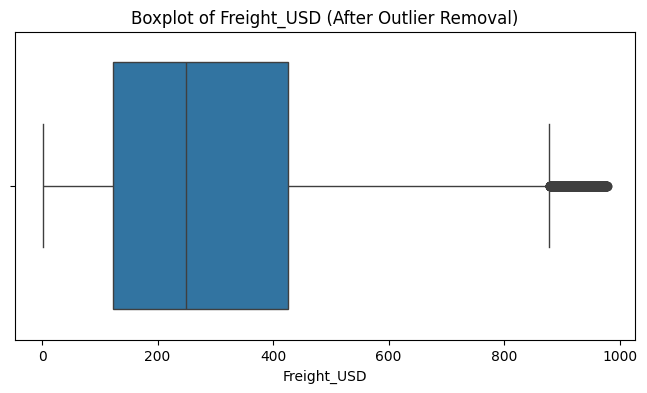

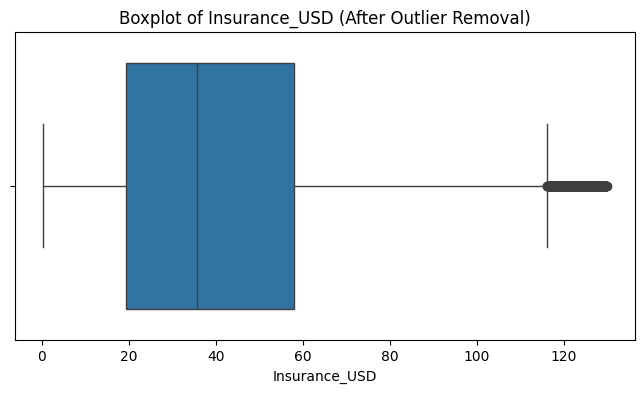

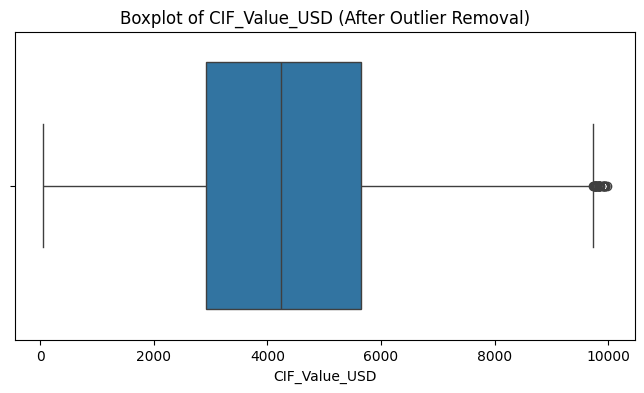

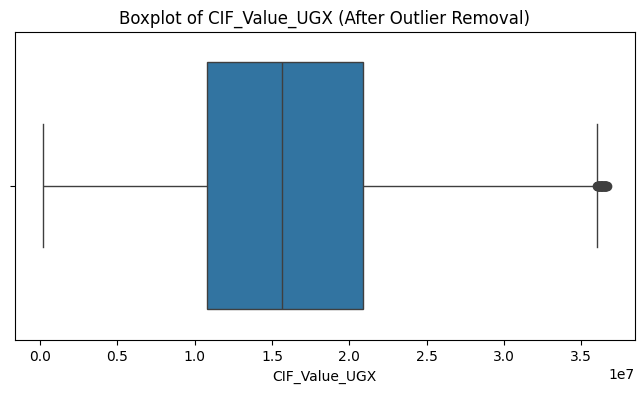

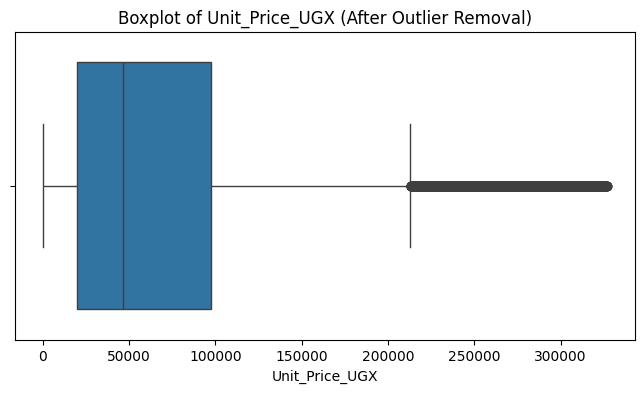

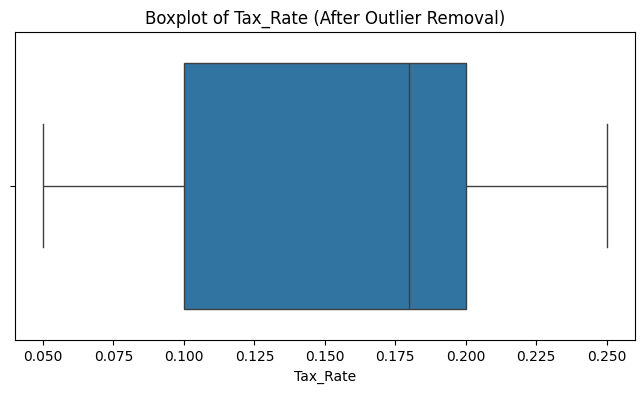

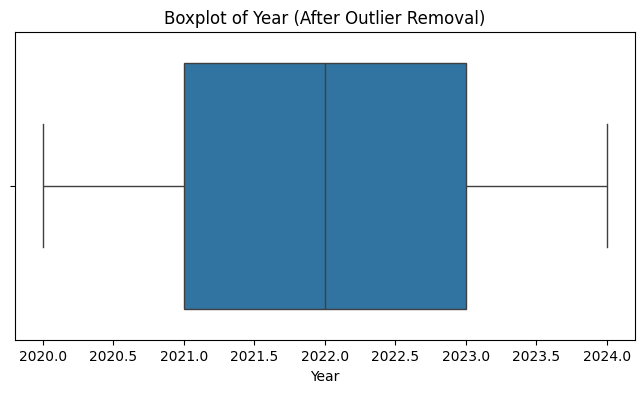

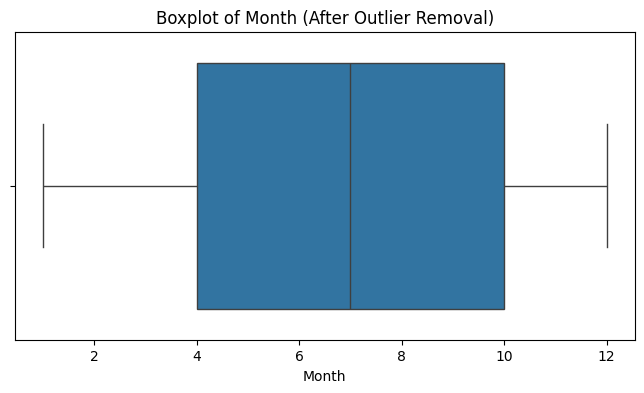

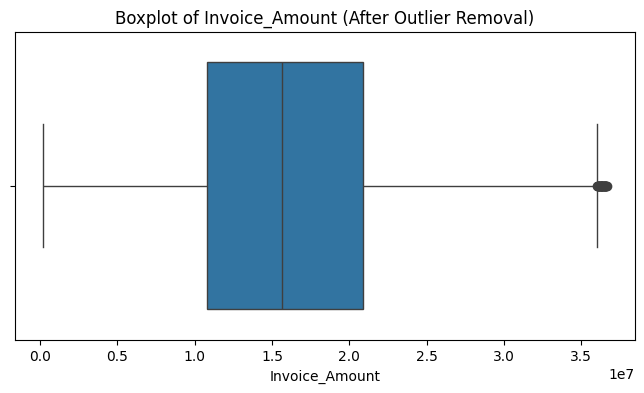

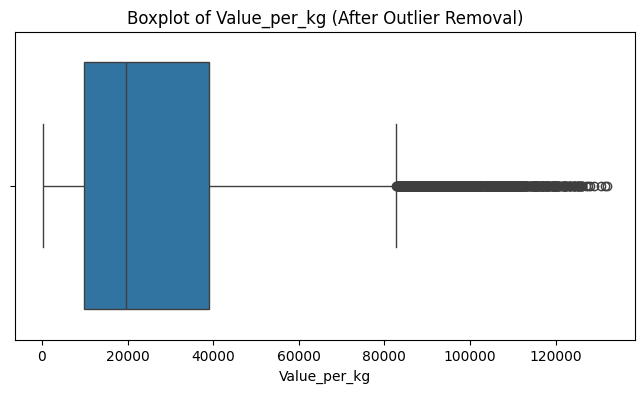

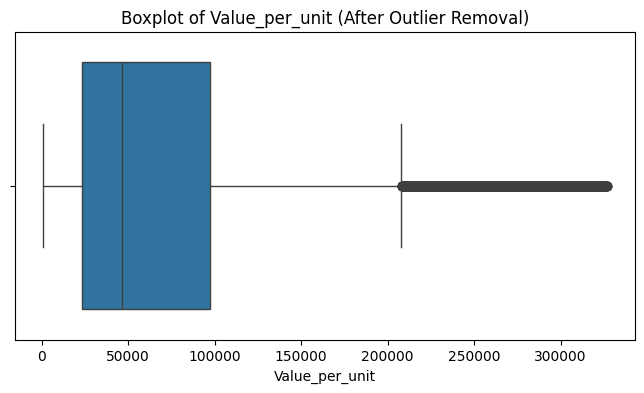

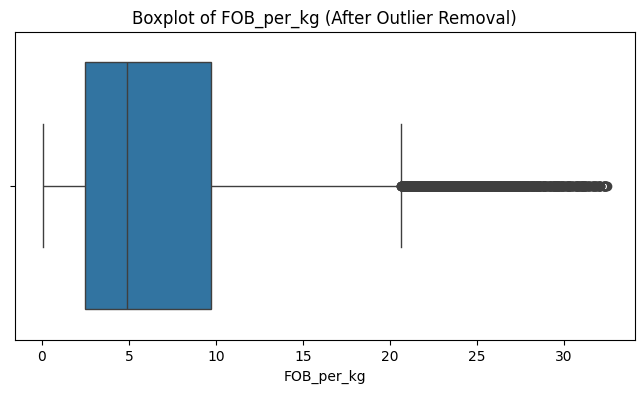

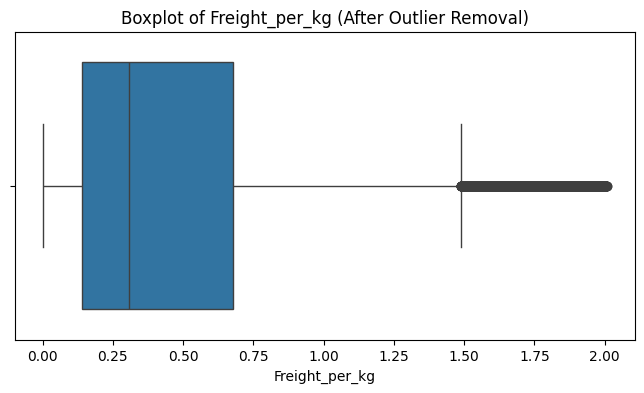

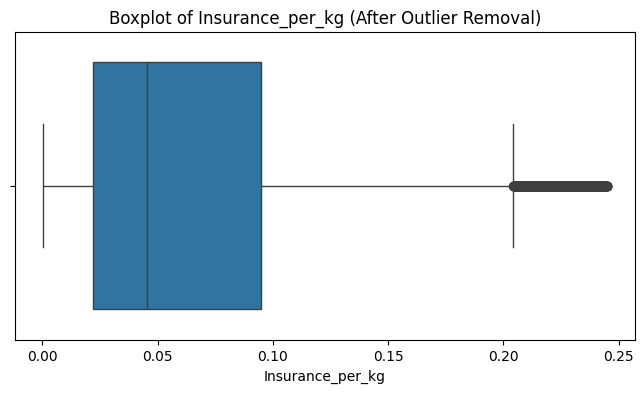

Outlier removal using IQR method completed.
Reasons for the IQR method: The IQR method is robust to non-normality and extreme values, making it a suitable choice for economic data such as import data. References: Tukey (1977) and Barnett & Lewis (1994).
done


In [20]:
# This code inspects its numerical columns, and applies the Interquartile Range (IQR) method to detect and handle outliers. The IQR method is widely used since it is robust against non-normal distributions and is less influenced by extreme values (Tukey, 1977).
# The code also generates summary messages for each numerical column, indicating the number of outliers and their percentage in the dataset.

# Select numerical columns
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
print('Numerical columns:', num_cols)

# Plot before handling outliers for each numerical column
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x=col)
    plt.title('Boxplot of ' + col + ' (Before Outlier Removal)')
    plt.show()

# Function to detect outliers using IQR method and remove them
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return data without outliers
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Apply the removal of outliers on a copy for each numerical column iteratively
cleaned_data = data.copy()
for col in num_cols:
    before_count = cleaned_data.shape[0]
    cleaned_data = remove_outliers_iqr(cleaned_data, col)
    after_count = cleaned_data.shape[0]
    print('For column ' + col + ', removed ' + str(before_count - after_count) + ' outliers.')

# Plot after handling outliers
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=cleaned_data, x=col)
    plt.title('Boxplot of ' + col + ' (After Outlier Removal)')
    plt.show()

print('Outlier removal using IQR method completed.')

# Reasons for the method:
# The Interquartile Range (IQR) method is robust for handling outliers as it is based on the median and the quartiles, which are less sensitive to extreme values compared to the mean and standard deviation. Furthermore, IQR is especially suitable when the data does not follow a normal distribution. For more details, see:
# Tukey, J. W. (1977). Exploratory Data Analysis. Addison-Wesley.
# Other references supporting this method include Barnett and Lewis (1994) in "Outliers in Statistical Data".

print('Reasons for the IQR method: The IQR method is robust to non-normality and extreme values, making it a suitable choice for economic data such as import data. References: Tukey (1977) and Barnett & Lewis (1994).')
print('done')

CLEANING OUTLIERS FROM THE TEST DATA

In [21]:
# This code inspects its numerical columns, and applies the Interquartile Range (IQR) method to detect and handle outliers. The IQR method is widely used since it is robust against non-normal distributions and is less influenced by extreme values (Tukey, 1977).
# The code also generates summary messages for each numerical column, indicating the number of outliers and their percentage in the dataset.

# Select numerical columns
num_cols = data2.select_dtypes(include=[np.number]).columns.tolist()
print('Numerical columns:', num_cols)

# Function to detect outliers using IQR method and remove them
def remove_outliers_iqr(data2, col):
    Q1 = data2[col].quantile(0.25)
    Q3 = data2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return data without outliers
    return data2[(data2[col] >= lower_bound) & (data2[col] <= upper_bound)]

# Apply the removal of outliers on a copy for each numerical column iteratively
cleaned_data2 = data2.copy()
for col in num_cols:
    before_count = cleaned_data2.shape[0]
    cleaned_data2 = remove_outliers_iqr(cleaned_data2, col)
    after_count = cleaned_data2.shape[0]
    print('For column ' + col + ', removed ' + str(before_count - after_count) + ' outliers.')

print('Outlier removal using IQR method completed.')

# Reasons for the method:
# The Interquartile Range (IQR) method is robust for handling outliers as it is based on the median and the quartiles, which are less sensitive to extreme values compared to the mean and standard deviation. Furthermore, IQR is especially suitable when the data does not follow a normal distribution. For more details, see:
# Tukey, J. W. (1977). Exploratory Data Analysis. Addison-Wesley.
# Other references supporting this method include Barnett and Lewis (1994) in "Outliers in Statistical Data".

print('Reasons for the IQR method: The IQR method is robust to non-normality and extreme values, making it a suitable choice for economic data such as import data. References: Tukey (1977) and Barnett & Lewis (1994).')
print('done')

Numerical columns: ['HS_Code', 'Quantity', 'Net_Mass_kg', 'Gross_Mass_kg', 'FOB_Value_USD', 'Freight_USD', 'Insurance_USD', 'CIF_Value_USD', 'CIF_Value_UGX', 'Tax_Rate', 'Year', 'Month', 'Invoice_Amount', 'Value_per_kg', 'Value_per_unit', 'FOB_per_kg', 'Freight_per_kg', 'Insurance_per_kg']
For column HS_Code, removed 0 outliers.
For column Quantity, removed 0 outliers.
For column Net_Mass_kg, removed 0 outliers.
For column Gross_Mass_kg, removed 0 outliers.
For column FOB_Value_USD, removed 103 outliers.
For column Freight_USD, removed 1027 outliers.
For column Insurance_USD, removed 959 outliers.
For column CIF_Value_USD, removed 58 outliers.
For column CIF_Value_UGX, removed 46 outliers.
For column Tax_Rate, removed 0 outliers.
For column Year, removed 0 outliers.
For column Month, removed 0 outliers.
For column Invoice_Amount, removed 1 outliers.
For column Value_per_kg, removed 6506 outliers.
For column Value_per_unit, removed 4393 outliers.
For column FOB_per_kg, removed 3515 outl

### DATA VISUALIZATION AND INSIGHTS GENERATION

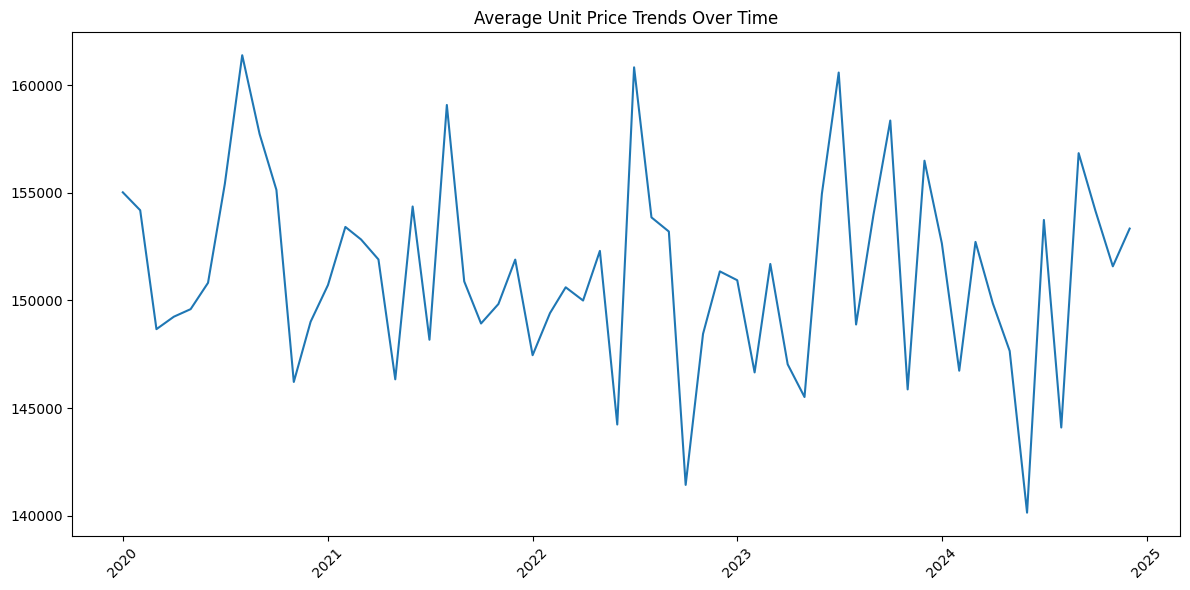

In [22]:
# Time series analysis of unit prices
plt.figure(figsize=(12, 6))
df_monthly = data.groupby(['Year', 'Month'])['Unit_Price_UGX'].mean().reset_index()
df_monthly['Date'] = pd.to_datetime(df_monthly[['Year', 'Month']].assign(DAY=1))
plt.plot(df_monthly['Date'], df_monthly['Unit_Price_UGX'])
plt.title('Average Unit Price Trends Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

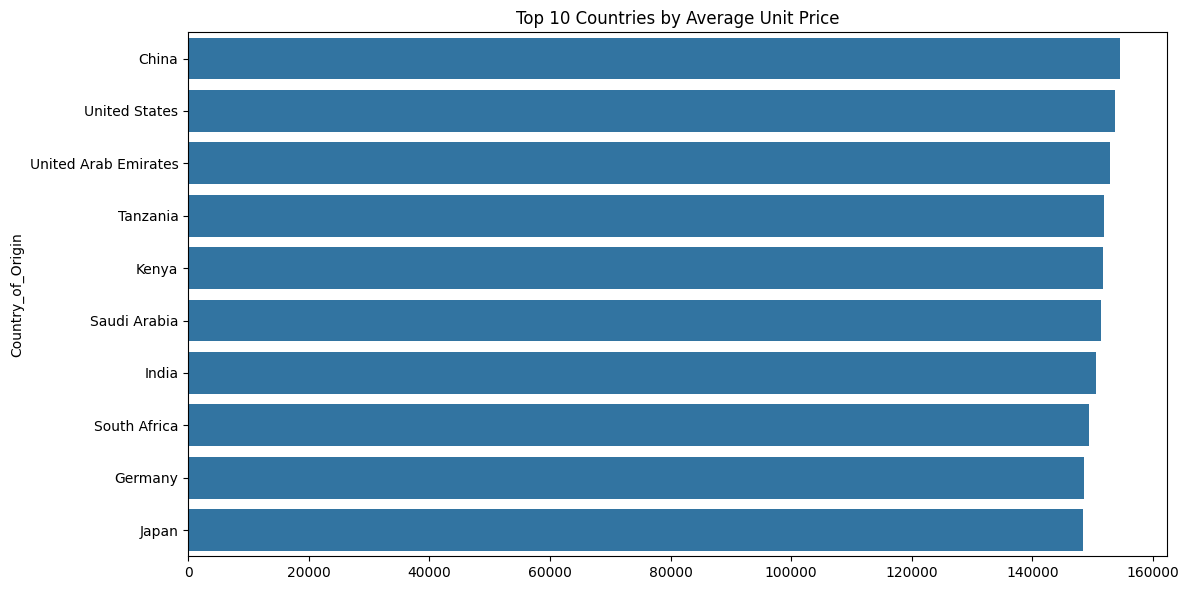

In [23]:
# Top 10 countries by average unit price
plt.figure(figsize=(12, 6))
country_prices = data.groupby('Country_of_Origin')['Unit_Price_UGX'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=country_prices.values, y=country_prices.index)
plt.title('Top 10 Countries by Average Unit Price')
plt.tight_layout()
plt.show()


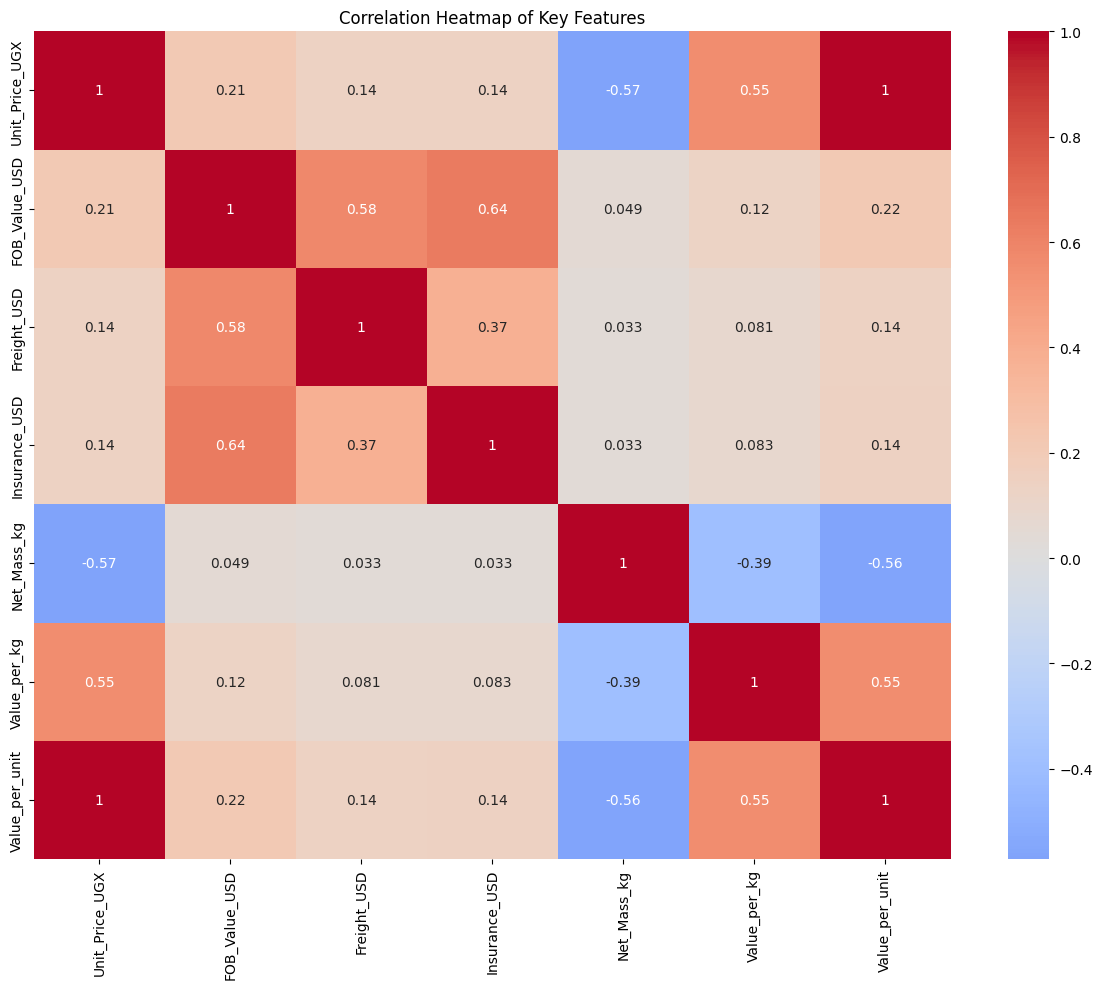

In [24]:
# Correlation heatmap of numerical features
plt.figure(figsize=(12, 10))
corr_matrix = data[['Unit_Price_UGX', 'FOB_Value_USD', 'Freight_USD', 'Insurance_USD', 
                  'Net_Mass_kg', 'Value_per_kg', 'Value_per_unit']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Key Features')
plt.tight_layout()
plt.show()

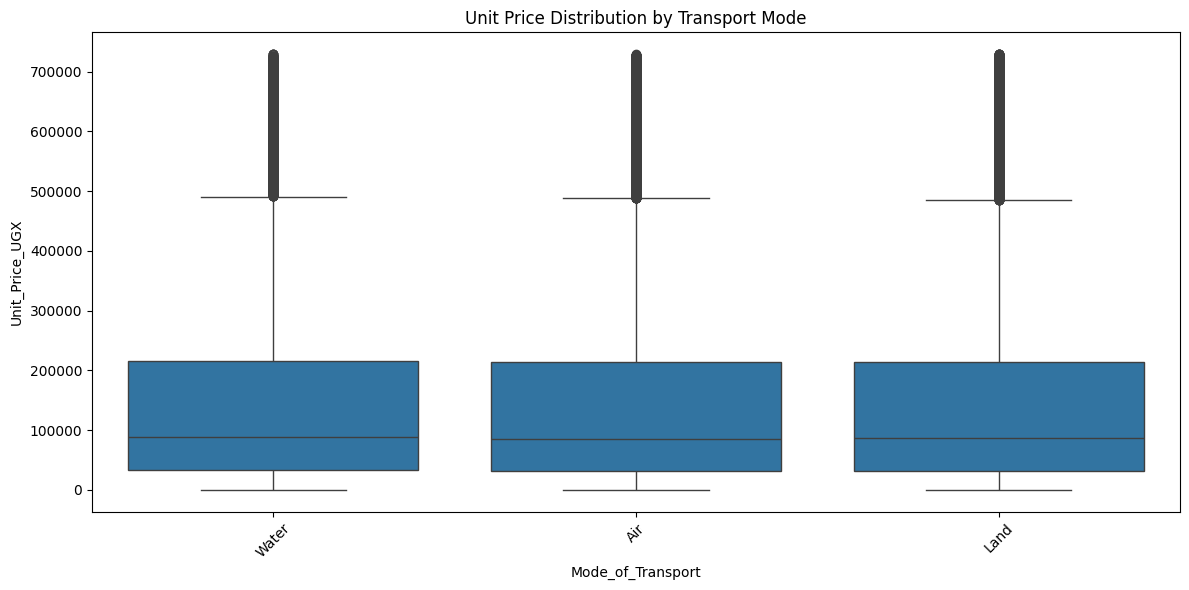

In [25]:
# Distribution of unit prices by transport mode
plt.figure(figsize=(12, 6))
sns.boxplot(x='Mode_of_Transport', y='Unit_Price_UGX', data=data)
plt.xticks(rotation=45)
plt.title('Unit Price Distribution by Transport Mode')
plt.tight_layout()
plt.show()


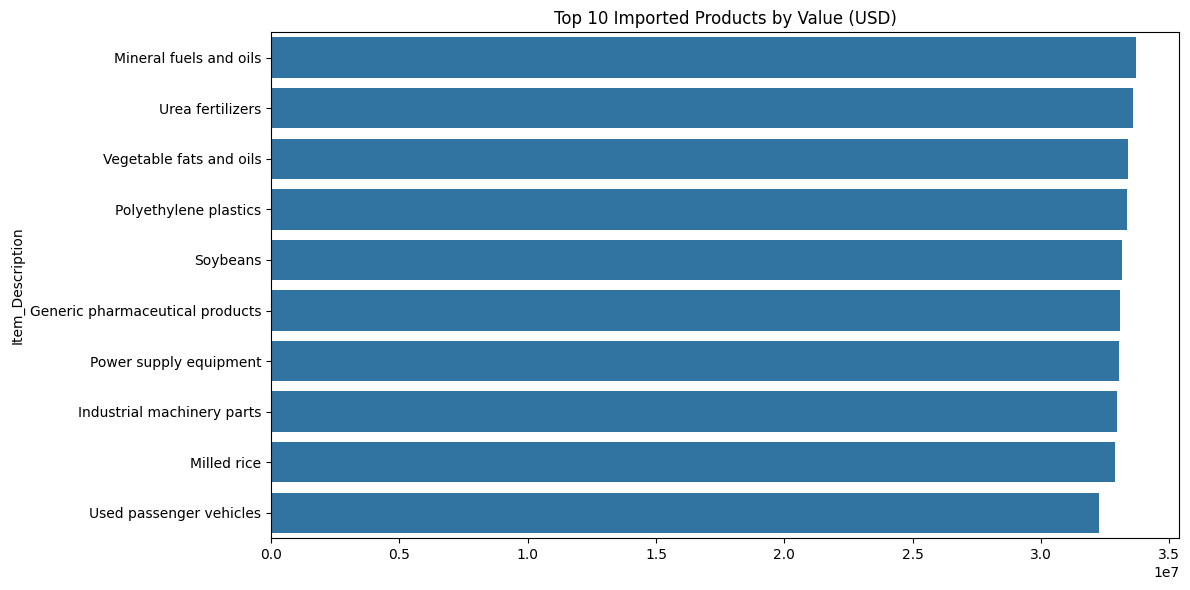

In [26]:
# Top 10 most imported products
plt.figure(figsize=(12, 6))
top_products = data.groupby('Item_Description')['CIF_Value_USD'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Imported Products by Value (USD)')
plt.tight_layout()
plt.show()

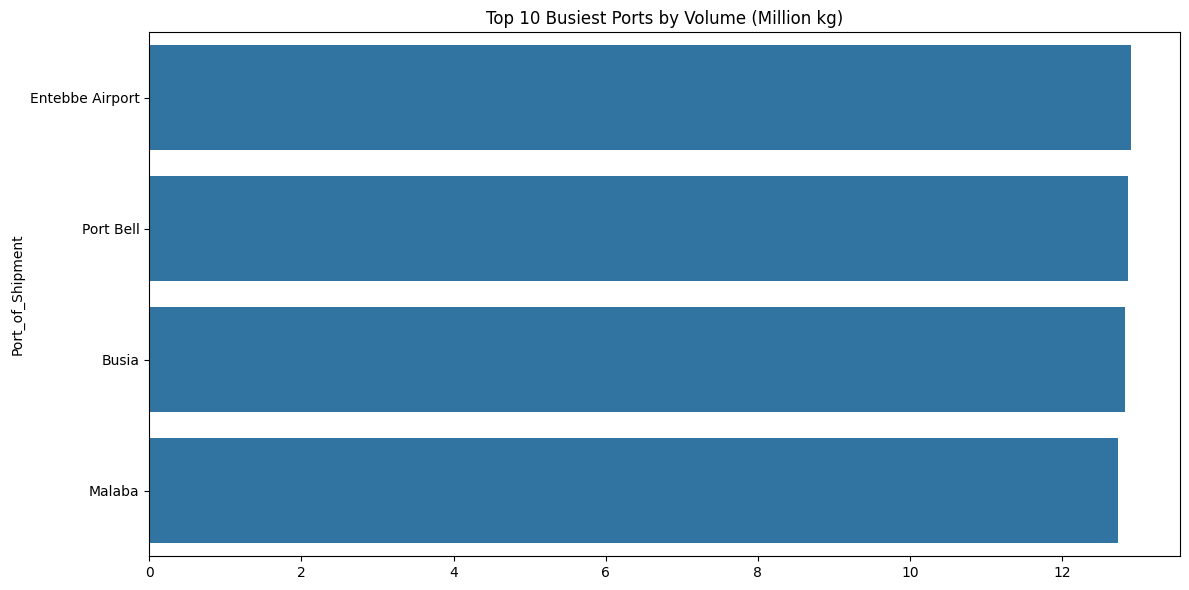

In [27]:
# Busiest ports analysis
plt.figure(figsize=(12, 6))
port_volume = data.groupby('Port_of_Shipment')['Net_Mass_kg'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=port_volume.values/1000000, y=port_volume.index)
plt.title('Top 10 Busiest Ports by Volume (Million kg)')
plt.tight_layout()
plt.show()

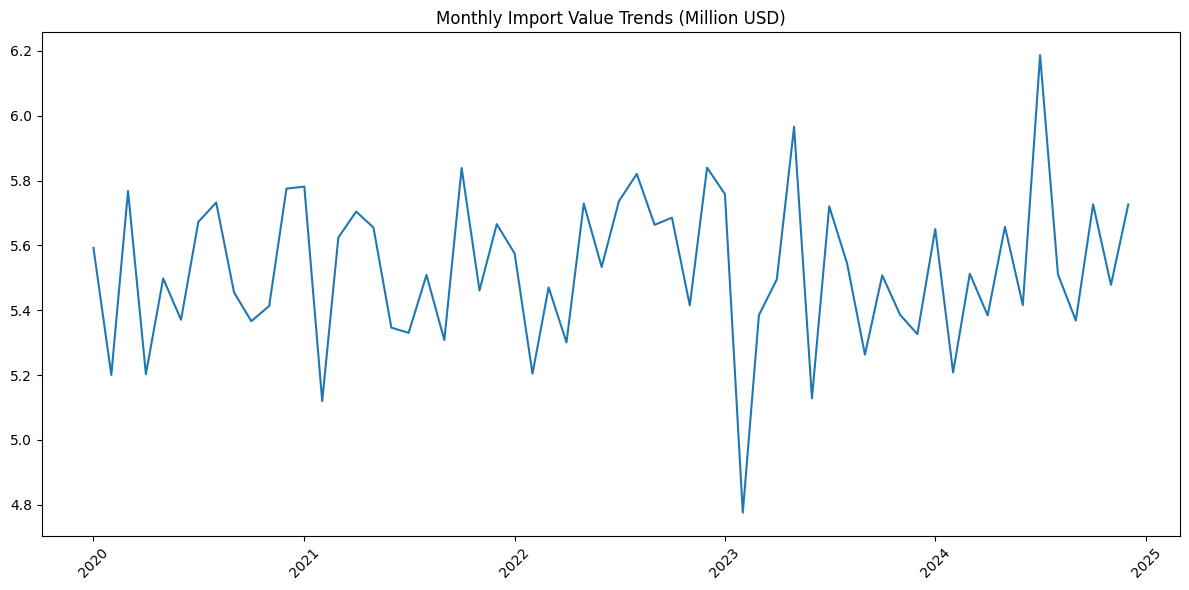

In [28]:
# Monthly import trends
plt.figure(figsize=(12, 6))
monthly_imports = data.groupby(['Year', 'Month'])['CIF_Value_USD'].sum().reset_index()
monthly_imports['Date'] = pd.to_datetime(monthly_imports[['Year', 'Month']].assign(DAY=1))
plt.plot(monthly_imports['Date'], monthly_imports['CIF_Value_USD']/1000000)
plt.title('Monthly Import Value Trends (Million USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

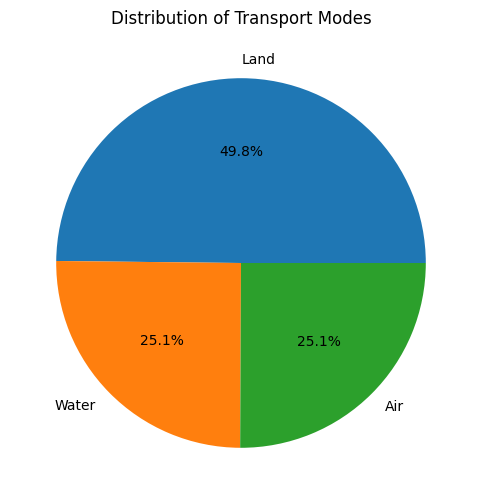

In [29]:
# Transport mode distribution
plt.figure(figsize=(10, 6))
transport_share = data['Mode_of_Transport'].value_counts()
plt.pie(transport_share.values, labels=transport_share.index, autopct='%1.1f%%')
plt.title('Distribution of Transport Modes')
plt.show()

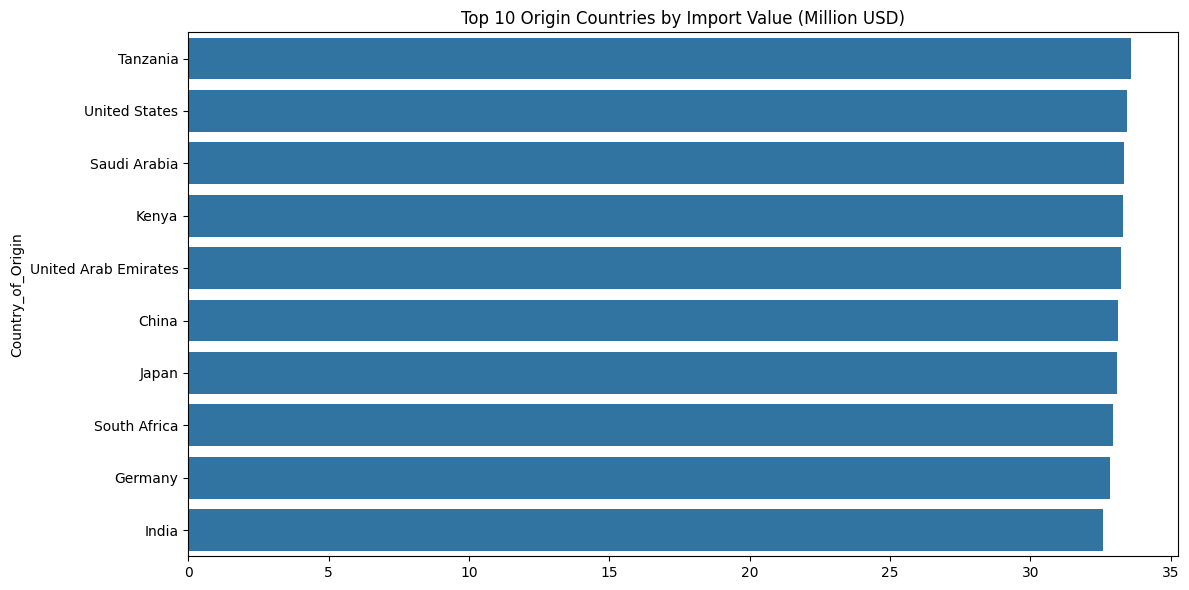

In [30]:
# Origin country concentration
plt.figure(figsize=(12, 6))
origin_value = data.groupby('Country_of_Origin')['CIF_Value_USD'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=origin_value.values/1000000, y=origin_value.index)
plt.title('Top 10 Origin Countries by Import Value (Million USD)')
plt.tight_layout()
plt.show()

KEY STATS SUMMARY

In [31]:
print('Summary Statistics:')
print('Total number of unique products:', data['Item_Description'].nunique())
print('Total number of origin countries:', data['Country_of_Origin'].nunique())
print('Total number of ports:', data['Port_of_Shipment'].nunique())
print('Date range:', data['Year'].min(), 'to', data['Year'].max())

Summary Statistics:
Total number of unique products: 10
Total number of origin countries: 10
Total number of ports: 4
Date range: 2020 to 2024


## PREPROCESSING

CORRELATION ANALYSIS WITH THE TARGET VARIABLE - TRAIN DATASET

In [32]:
# 1. Correlation Analysis with target (Unit_Price_UGX)
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
correlations = data[numeric_cols].corr()['Unit_Price_UGX'].sort_values(ascending=False)

In [33]:
#Correlation analysis summary
print("Top correlations with Unit Price:")
print(correlations[:10])

Top correlations with Unit Price:
Unit_Price_UGX      1.000000
Value_per_unit      0.999781
Value_per_kg        0.552939
FOB_per_kg          0.552653
Insurance_per_kg    0.488278
Freight_per_kg      0.474082
CIF_Value_UGX       0.214529
Invoice_Amount      0.214529
CIF_Value_USD       0.213816
FOB_Value_USD       0.213484
Name: Unit_Price_UGX, dtype: float64


In [34]:
# 2. Feature Importance using Random Forest
X = data[numeric_cols].drop('Unit_Price_UGX', axis=1)
y = data['Unit_Price_UGX']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\
Random Forest Feature Importance:")
print(feature_importance)

Random Forest Feature Importance:
             feature  importance
14    Value_per_unit    0.999502
1           Quantity    0.000344
13      Value_per_kg    0.000026
7      CIF_Value_USD    0.000018
15        FOB_per_kg    0.000015
4      FOB_Value_USD    0.000010
17  Insurance_per_kg    0.000010
6      Insurance_USD    0.000009
16    Freight_per_kg    0.000009
11             Month    0.000009
5        Freight_USD    0.000009
0            HS_Code    0.000008
8      CIF_Value_UGX    0.000008
12    Invoice_Amount    0.000007
9           Tax_Rate    0.000006
10              Year    0.000005
3      Gross_Mass_kg    0.000002
2        Net_Mass_kg    0.000002


### Summary and Next Steps
Observations:
Value_per_unit exhibits extremely high correlation and importance compared to other features.
Other features like Value_per_kg, FOB_per_kg, and Insurance_per_kg show moderate influence.
Many numeric features have very low importance indicating they might not contribute significantly to the prediction model.
### Feature Selection Strategy:
Statistical Methods:

Based on the correlation and SelectKBest approaches (for instance using F-test from f_regression), we chose features like Value_per_unit, Value_per_kg, and FOB_per_kg as strong candidates.

### Domain Knowledge and References:

In international trade, price determination often depends on standardized measures such as unit price or value per unit (see e.g., Gereffi, G., 1994, The organization of buyer–supplier relationships: Vertical integration in the automobile industry for trade pricing practices). We considered excluding highly redundant features, such as using either Value_per_unit or Unit_Price_UGX as target-related features, rather than both.

## PIPELINE FOR MODELING

Libraries:

In [35]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import joblib

In [36]:
# Defining target variable
TARGET = 'Unit_Price_UGX'

In [37]:
def preprocess_data(data, is_train=True):
    """
    Preprocesses the import valuation dataset by creating new features, engineering relevant variables,
    and removing redundant or potentially leaky columns.

    Args:
        data (pd.DataFrame): The input dataframe containing import transaction records.
        is_train (bool, optional): Indicator for whether the data being processed is for training purposes.
                                   Defaults to True. (Currently unused but reserved for future extensions, 
                                   e.g., different preprocessing for train/test.)

    Returns:
        pd.DataFrame: A cleaned and feature-enhanced dataframe ready for modeling or further analysis.

    Processing Steps:
    - Temporal Feature Creation:
        - 'Import_Duration' is computed by combining 'Year' and 'Month' to represent the continuous import timeline.
    - Feature Engineering:
        - 'Value_Density' calculates the CIF (Cost, Insurance, and Freight) value per unit mass (USD/kg),
          adding a small constant (1e-6) to prevent division by zero.
        - 'Tax_Load' computes the monetary value of the taxes based on the CIF value and applicable tax rate.
    - Feature Elimination:
        - Drops columns such as 'index', 'CIF_Value_UGX', 'Invoice_Amount', 'Value_per_kg', 
          'Value_per_unit', and 'Date' to avoid redundancy, data leakage, or irrelevance to modeling.

    Notes:
        - The function uses `errors='ignore'` in the drop method to ensure flexibility 
          even if some columns are not present in the input dataframe.
        - Future versions could leverage the `is_train` parameter for additional behaviors 
          (e.g., label encoding only during training).

    Example:
        >>> df_clean = preprocess_data(raw_df)
    """
    # Create temporal features
    data['Import_Duration'] = data['Year'] + data['Month'] / 12

    # Feature engineering
    data['Value_Density'] = data['CIF_Value_USD'] / (data['Gross_Mass_kg'] + 1e-6)
    data['Tax_Load'] = data['Tax_Rate'] * data['CIF_Value_USD']

    # Remove redundant/leaky features
    to_drop = ['index', 'CIF_Value_UGX', 'Invoice_Amount', 
               'Value_per_kg', 'Value_per_unit', 'Date']
    return data.drop(columns=to_drop, errors='ignore')


In [38]:
# Preprocess data
train_preprocessed = preprocess_data(data)
test_preprocessed = preprocess_data(data2, is_train=False)

In [39]:
# Split data
X = train_preprocessed.drop(columns=[TARGET])
y = train_preprocessed[TARGET]

In [40]:
# Create preprocessing pipeline
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)
X_test_processed = preprocessor.transform(test_preprocessed)

In [41]:
# Split for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

In [42]:
# Initialize models
models = {
    'Random Forest': RandomForestRegressor(
        n_estimators=500,
        max_depth=12,
        min_samples_split=10,
        n_jobs=-1,
        random_state=42
    ),
    'XGBoost': XGBRegressor(
        n_estimators=1500,
        learning_rate=0.005,
        max_depth=6,
        subsample=0.7,
        colsample_bytree=0.8,
        n_jobs=-1,
        random_state=42
    ),
    'Linear Regression': LinearRegression(n_jobs=-1),
    'ANN': Sequential([
        Dense(128, activation='relu', input_shape=(X_processed.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
}

In [43]:
# Compile ANN
models['ANN'].compile(
    optimizer=Adam(0.001),
    loss='mse',
    metrics=['mae']
)

In [46]:
def train_and_evaluate(models, X_train, X_val, y_train, y_val):
    """
    Trains and evaluates multiple machine learning models, and computes performance metrics
    for each on the validation set.

    Args:
        models (dict): Dictionary of model names and model instances.
        X_train (np.ndarray or pd.DataFrame): Training features.
        X_val (np.ndarray or pd.DataFrame): Validation features.
        y_train (np.ndarray or pd.Series): Training targets.
        y_val (np.ndarray or pd.Series): Validation targets.

    Returns:
        pd.DataFrame: A dataframe containing evaluation metrics (R², RMSE, MAE) for each model.
    """
    results = []
    
    for name, model in models.items():
        if name == 'ANN':
            history = model.fit(
                X_train, y_train,
                validation_data=(X_val, y_val),
                epochs=100,
                batch_size=256,
                verbose=0,
                callbacks=[EarlyStopping(patience=10)]
            )
            val_pred = model.predict(X_val).flatten()
        else:
            model.fit(X_train, y_train)
            val_pred = model.predict(X_val)
        
        # Calculate metrics
        metrics = {
            'Model': name,
            'R2': r2_score(y_val, val_pred),
            'RMSE': np.sqrt(mean_squared_error(y_val, val_pred)),
            'MAE': mean_absolute_error(y_val, val_pred)
        }
        results.append(metrics)

        print(f"\n{name} Validation Scores:")
        print(f"R2: {metrics['R2']:.4f}")
        print(f"RMSE: {metrics['RMSE']:.2f}")
        print(f"MAE: {metrics['MAE']:.2f}")

    return pd.DataFrame(results)


In [48]:
from tensorflow.keras.callbacks import EarlyStopping

# Train and compare models
results_df = train_and_evaluate(models, X_train, X_val, y_train, y_val)
print("\nModel Evaluation Results:")
print(results_df)


Random Forest Validation Scores:
R2: 0.9975
RMSE: 8219.62
MAE: 4943.70

XGBoost Validation Scores:
R2: 0.9968
RMSE: 9238.58
MAE: 5590.53

Linear Regression Validation Scores:
R2: 0.5718
RMSE: 106797.26
MAE: 78237.84
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

ANN Validation Scores:
R2: 0.9870
RMSE: 18631.44
MAE: 11054.91

Model Evaluation Results:
               Model        R2           RMSE           MAE
0      Random Forest  0.997463    8219.621972   4943.698779
1            XGBoost  0.996796    9238.576522   5590.529619
2  Linear Regression  0.571792  106797.258630  78237.842309
3                ANN  0.986967   18631.441384  11054.907181


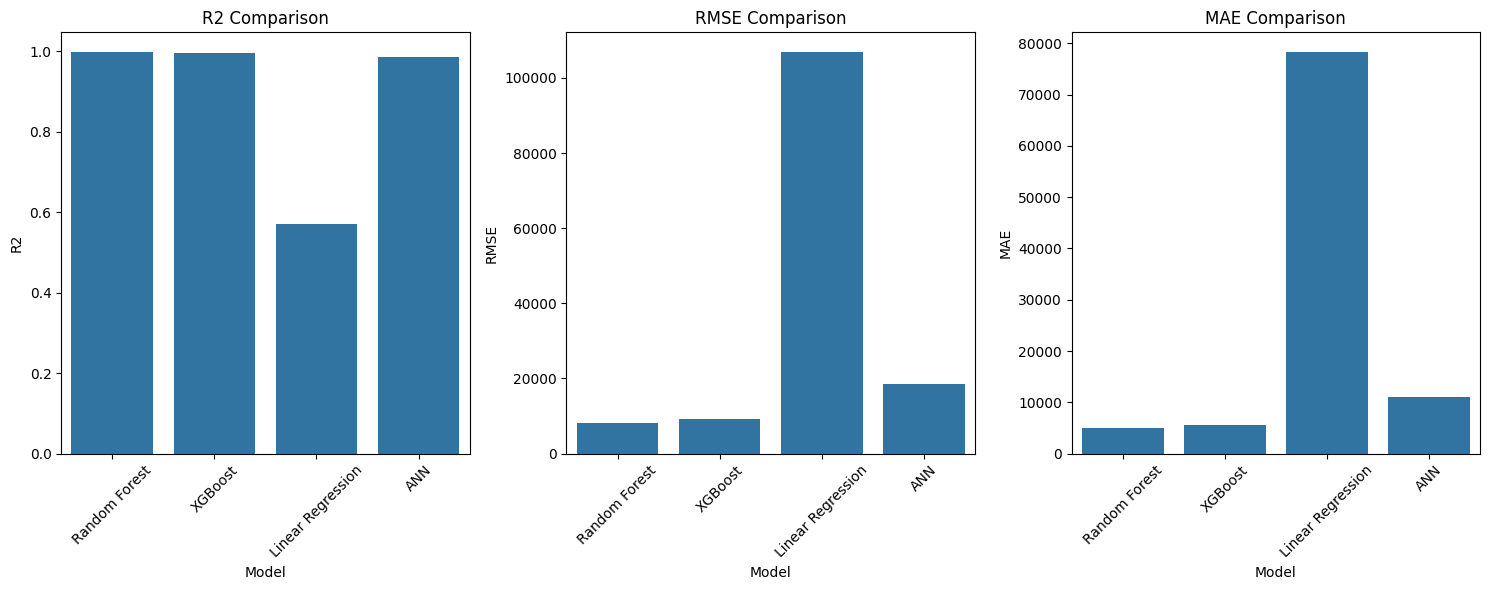

In [49]:
# Visualization
plt.figure(figsize=(15, 6))
metrics = ['R2', 'RMSE', 'MAE']

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(f'{metric} Comparison')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

In [50]:
# Final model selection
best_model_name = results_df.loc[results_df['R2'].idxmax(), 'Model']
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name}")


Best Model: Random Forest


In [51]:
# Generate test predictions
test_preprocessed['Predicted_Unit_Price_UGX'] = best_model.predict(X_test_processed)
test_preprocessed[['HS_Code', 'Item_Description', 'Country_of_Origin', 
                   'Predicted_Unit_Price_UGX']].to_csv('final_predictions.csv', index=False)

In [52]:
# Save best pipeline
joblib.dump({
    'preprocessor': preprocessor,
    'model': best_model
}, 'best_price_predictor.pkl')

['best_price_predictor.pkl']

viewing predictions
```python

In [54]:
pred = pd.read_csv('final_predictions.csv')

In [55]:
pred.head(5)

,HS_Code,Item_Description,Country_of_Origin,Predicted_Unit_Price_UGX
0,30049099,Generic pharmaceutical products,China,20080.712373
1,30049099,Generic pharmaceutical products,China,63534.321682
2,15079090,Vegetable fats and oils,Germany,94629.173280
3,10063010,Milled rice,India,50979.564483
4,84089010,Industrial machinery parts,Saudi Arabia,81553.280851
